# FIND IRIS

In [1]:
from matplotlib import pyplot as plt
plt.show()

****************************************************************************************************************
proccesing eyes\photo10_Face_1_Left.jpeg


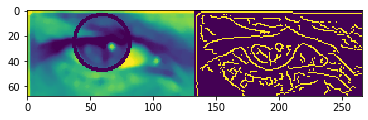

CIRCLES FOUND^^^\]


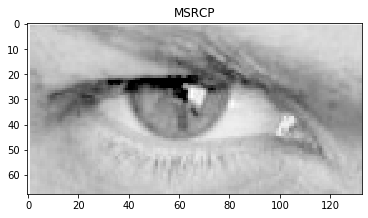

****************************************************************************************************************
proccesing [[[248 248 248]
  [249 249 249]
  [248 248 248]
  ...
  [246 246 246]
  [245 245 245]
  [246 246 246]]

 [[249 249 249]
  [195 195 195]
  [196 196 196]
  ...
  [219 219 219]
  [216 216 216]
  [216 216 216]]

 [[249 249 249]
  [203 203 203]
  [204 204 204]
  ...
  [219 219 219]
  [216 216 216]
  [216 216 216]]

 ...

 [[251 251 251]
  [201 201 201]
  [200 200 200]
  ...
  [199 199 199]
  [203 203 203]
  [201 201 201]]

 [[251 251 251]
  [202 202 202]
  [201 201 201]
  ...
  [202 202 202]
  [205 205 205]
  [199 199 199]]

 [[251 251 251]
  [205 205 205]
  [203 203 203]
  ...
  [204 204 204]
  [207 207 207]
  [198 198 198]]]


error: OpenCV(4.1.1) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


In [2]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os

import json


from matplotlib import pyplot as plt

import m3Iris, m3F, retinex, retinexRunnable

inputFolder = "eyes/"
outputFolder = "irises/"
irisesExpected = m3F.filecount(inputFolder)
irisesFound = 0

inputImages=glob.glob(inputFolder + "*.j*")

for imagePath in inputImages:
    
    # if outfolder does not exist, create it
    if not (os.path.exists(outputFolder)):
            os.mkdir(outputFolder)
            print("output folder did not exist,", outputFolder, "created.")
    

    # DO STUFF TO ALL IMAGES BELOW (SENDS IMAGEPATH TO YOUR FUNCTIONS)
    # *************************
    if (m3F.evalSize(imagePath,10,10)):
        
        # IMAGE PROCESSING HERE:
        imgOut = m3Iris.findCircle(imagePath)
        imgMSRCP = retinexRunnable.runMSRCP(imagePath)
        imgOut2 = m3Iris.findCircleImg(imgMSRCP)
        
    else:
        print("****************************************************************************************************************")
        m3F.printRed("####IMAGE TOOO SMALL###")
        continue;
        # *************************

     #change imagePath from input folder to output folder
    imagePath = imagePath.replace(inputFolder, "")
    imagePath = outputFolder + imagePath
    print("imagePath", imagePath)
    #print("length",len(imgOut))
    
    if (type(imgOut) == type(list())):
        #print("was list")
        # if output 
        eyes = iter(imgOut) # used to iterate thru an array. the output of first next() is the first element of array, and so on
        
        cv2.imwrite(imagePath,next(eyes))
        irisesFound += 1
    else:
        if not(type(imgOut) == type(None)):
            cv2.imwrite(imagePath,imgOut)
            irisesFound += 1
        #else:   
            #m3F.printRed("IMAGE NULL")
            
m3F.printBlue("Found {}% of irises in the images".format(irisesFound/irisesExpected*100))